In [904]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

#### Importação da base

In [854]:
df = pd.read_csv('dados_coletados80k.csv')

print(f'Base com {df.shape[0]} entradas e {df.shape[1]} variaveis')

Base com 80143 entradas e 24 variaveis


###  Visão geral dos dados e Análise exploratória

In [855]:
df.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322090928715,42,M,4000.00,MA,17.00,140,2022-11-18,143,160000.00,184000.00,2,1,1,2,SOLTEIRO(A),NaN,N,0.00,10,284.00,187861.70,1617.36,Sim
1,321990634715,31,M,3000.00,MA,20.00,28,2021-07-23,0,14000.00,16100.00,2,1,1,1,CASADO (A),NaN,N,0.00,26,771.00,16615.93,1239.98,Sim
2,321965373715,36,F,2100.00,SP,24.00,180,2021-04-01,149,60000.00,69000.00,4,1,0,1,CASADO (A),Nenhum,N,0.00,27,802.00,74443.40,1346.64,Sim
3,321967133715,28,M,2155.00,DF,19.00,190,2021-04-10,159,180000.00,207000.00,29,28,0,2,SOLTEIRO(A),Nenhum,N,0.00,2,41.00,196812.41,22713.63,Nao
4,322098744715,21,F,4300.00,MG,22.00,100,2022-12-28,94,30000.00,34500.00,4,3,0,1,SOLTEIRO(A),Ensino Médio,N,0.00,6,162.00,36114.39,900.80,Sim


In [856]:
# PERIODO DOS DADOS COLETADOS

inicio = pd.to_datetime(df['Data_Contratacao']).dt.date.min()
final = pd.to_datetime(df['Data_Contratacao']).dt.date.max()

print(f'Periodo dos dados de : {inicio} ate {final}')

Periodo dos dados de : 2020-11-25 ate 2023-02-22


In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          80143 non-null  int64  
 1   Idade                             80143 non-null  int64  
 2   Sexo                              80143 non-null  object 
 3   Valor_Renda                       80143 non-null  float64
 4   UF_Cliente                        80143 non-null  object 
 5   Perc_Juros                        80143 non-null  float64
 6   Prazo_Emprestimo                  80143 non-null  int64  
 7   Data_Contratacao                  80143 non-null  object 
 8   Prazo_Restante                    80143 non-null  int64  
 9   VL_Emprestimo                     80143 non-null  float64
 10  VL_Emprestimo_ComJuros            80143 non-null  float64
 11  QT_Total_Parcelas_Pagas           80143 non-null  int64  
 12  QT_T

In [858]:
# VALORES AUSENTES 

df.isnull().sum()

Contrato                                0
Idade                                   0
Sexo                                    0
Valor_Renda                             0
UF_Cliente                              0
Perc_Juros                              0
Prazo_Emprestimo                        0
Data_Contratacao                        0
Prazo_Restante                          0
VL_Emprestimo                           0
VL_Emprestimo_ComJuros                  0
QT_Total_Parcelas_Pagas                 0
QT_Total_Parcelas_Pagas_EmDia           0
QT_Total_Parcelas_Pagas_EmAtraso        0
Qt_Renegociacao                         0
Estado_Civil                            0
Escolaridade                        57298
Possui_Patrimonio                       0
VL_Patrimonio                           0
QT_Parcelas_Atraso                      0
QT_Dias_Atraso                      25795
Saldo_Devedor                           0
Total_Pago                              0
Possivel_Fraude                   

In [905]:
# VALORES UNICOS DAS VARIAVEIS

valores_unicos = {}

for coluna in df.columns:
    qtd = df[coluna].nunique()
    valores_unicos[coluna] = qtd


for coluna, qtd in valores_unicos.items():
    print(f'{coluna}: {qtd}')



Contrato: 80143
Idade: 86
Sexo: 2
Valor_Renda: 4747
UF_Cliente: 27
Perc_Juros: 53
Prazo_Emprestimo: 60
Data_Contratacao: 751
Prazo_Restante: 93
VL_Emprestimo: 73
VL_Emprestimo_ComJuros: 73
QT_Total_Parcelas_Pagas: 50
QT_Total_Parcelas_Pagas_EmDia: 48
QT_Total_Parcelas_Pagas_EmAtraso: 32
Qt_Renegociacao: 15
Estado_Civil: 5
VL_Patrimonio: 4
QT_Parcelas_Atraso: 35
QT_Dias_Atraso: 38
Saldo_Devedor: 64166
Total_Pago: 54074
Possivel_Fraude: 2
Faixa_Etaria: 6
Faixa_Salarial: 8
Faixa_Dias_Atraso: 7
Faixa_Prazo_Emprestimo: 4
Faixa_Prazo_Restante: 4


In [860]:
# RESUMO ESTATISTICO DAS VARIAVEIS 

df.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,54348.00,80143.00,80143.00
mean,322023695416.17,38.82,29308.62,19.49,102.33,93.28,72847.78,83774.94,10.71,5.24,2.34,1.30,1.45,10.65,475.26,78622.32,9687.98
std,44697010.94,12.53,2748166.27,3.56,62.32,70.64,87407.93,100519.12,9.31,6.21,3.97,1.27,355.10,10.43,269.79,102318.95,19090.62
min,321944855715.00,4.00,0.00,4.49,14.00,-18.00,3000.00,3450.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,321984967215.00,29.00,2050.00,18.00,55.00,36.00,15000.00,17250.00,2.00,1.00,0.00,0.00,0.00,0.00,284.00,12122.76,1052.16
50%,322024156715.00,37.00,3000.00,20.00,80.00,78.00,40000.00,46000.00,8.00,2.00,1.00,1.00,0.00,9.00,468.00,35489.36,3951.39
75%,322062662215.00,46.00,5000.00,21.00,170.00,156.00,100000.00,115000.00,18.00,7.00,3.00,2.00,0.00,20.00,708.00,117783.25,10886.24
max,322099706715.00,103.00,765000000.00,28.00,240.00,227.00,500000.00,575000.00,66.00,66.00,31.00,38.00,100000.00,34.00,1014.00,626261.27,465821.39


Algumas variaveis numericas estao apresentando escalas diferentes, o que pode ser um problema para um modelo de Machine Learning. Algums algoritimos de ML são sensiveis a escala das variaveis, isso significa que variaveis com escalas muito desiguais podem ter um impacto desigual no modelo.

Uma abordagem para resolver esse problema é a tecnica de normalização dos dados, será aplicado na modelagem .

### Variáveis Categóricas

   - Análise Univariada
   - Distribuição das Variáveis
   - Ajustes, tratamentos e transformaçoes de variáveis se necessarias.

In [861]:
variaveis_categoricas = df.select_dtypes(include=['object']).columns
print(variaveis_categoricas)

Index(['Sexo', 'UF_Cliente', 'Data_Contratacao', 'Estado_Civil',
       'Escolaridade', 'Possui_Patrimonio', 'Possivel_Fraude'],
      dtype='object')


##### Sexo

M    48500
F    31643
Name: Sexo, dtype: int64


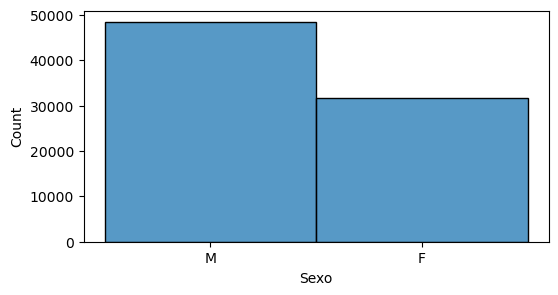

In [862]:
print(df['Sexo'].value_counts())

plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Sexo', bins=2)
plt.show()

##### Estado Civil

In [863]:
df['Estado_Civil'].value_counts()

SOLTEIRO(A)               45205
CASADO (A)                23576
OUTRO                      5912
DIVORCIADO                 3783
VIÚVO(A)                   1158
UNIÃO ESTAVEL               501
SEPARADO JUDICIALMENTE        4
NENHUM                        4
Name: Estado_Civil, dtype: int64

SOLTEIRO(A)    45205
CASADO (A)     24077
OUTRO           5916
DIVORCIADO      3787
VIÚVO(A)        1158
Name: Estado_Civil, dtype: int64


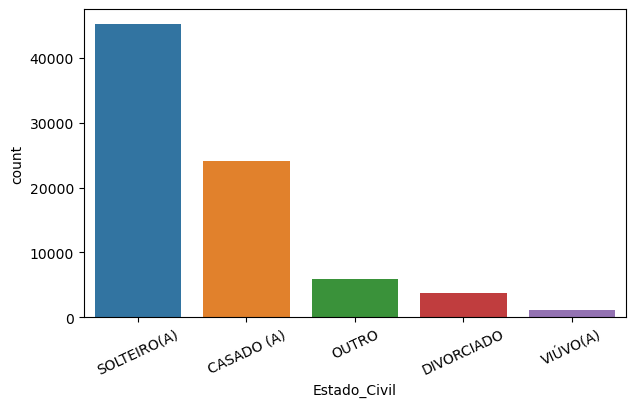

In [906]:
# ALTERAÇÃO DE DADOS EM ESTADO CIVIL
df['Estado_Civil'] = df['Estado_Civil'].replace(['NENHUM'], 'OUTRO')
df['Estado_Civil'] = df['Estado_Civil'].replace(['UNIÃO ESTAVEL'], 'CASADO (A)')
df['Estado_Civil'] = df['Estado_Civil'].replace(['SEPARADO JUDICIALMENTE'], 'DIVORCIADO')
print(df['Estado_Civil'].value_counts())

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Estado_Civil')
plt.xticks(rotation=25)
plt.show()

##### Escolaridade

Nenhum                                  21168
Ensino Médio                              902
Ensino Superior                           600
Ensino Fundamental                        126
Pós Graduação / Mestrado / Doutorado       49
Name: Escolaridade, dtype: int64


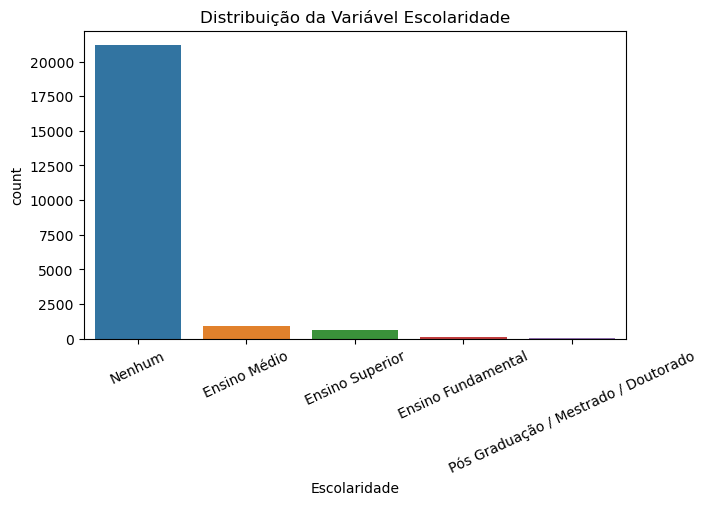

In [865]:
print(df['Escolaridade'].value_counts())

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Escolaridade')
plt.title('Distribuição da Variável Escolaridade')
plt.xticks(rotation=25)
plt.show()

Essa variavel apresenta a maioria dos seus valores como 'Nenhum', o que não traz tanta informação e não é relevante para o modelo, portanto ela será retirada.

In [866]:
df.drop('Escolaridade', axis=1, inplace=True)

##### Possui_Patrimonio

N    79785
S      358
Name: Possui_Patrimonio, dtype: int64


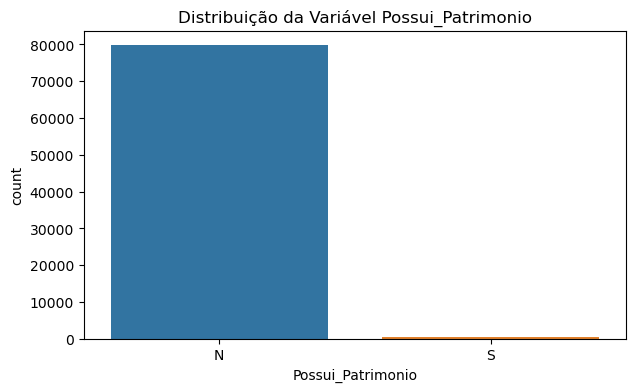

In [867]:
print(df['Possui_Patrimonio'].value_counts())

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Possui_Patrimonio')
plt.title('Distribuição da Variável Possui_Patrimonio')
plt.show()

Essa variável tambem será retirada devido a sua distribuição.

In [868]:
df.drop('Possui_Patrimonio', axis=1, inplace=True)

##### UF_CLIENTE

SP    21393
MG    13718
BA     6709
PR     5794
GO     3860
MA     3593
RS     3500
PA     3443
SC     2555
PE     2502
RJ     2462
MS     2120
CE     2050
PB     1442
MT      984
AL      867
RN      759
PI      731
DF      583
SE      415
ES      312
TO      157
AM       76
RO       55
AC       25
AP       23
RR       15
Name: UF_Cliente, dtype: int64


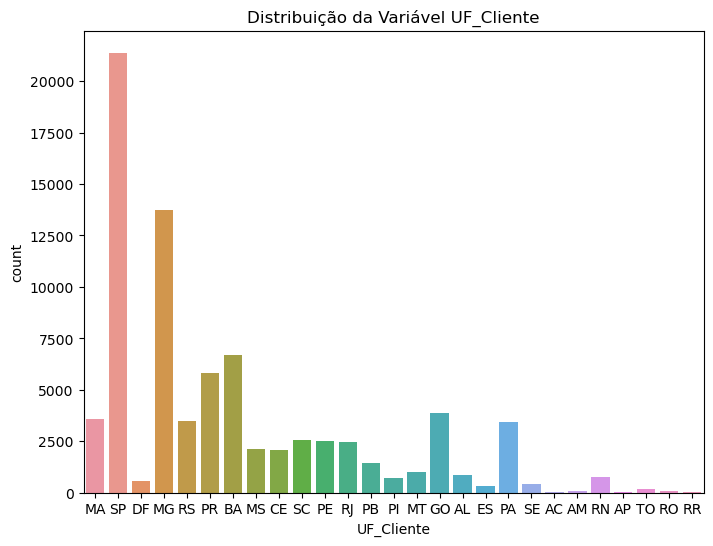

In [869]:
print(df['UF_Cliente'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='UF_Cliente')
plt.title('Distribuição da Variável UF_Cliente')
plt.show()

##### Possivel_Fraude (Variável Target)

Sim    44511
Nao    35632
Name: Possivel_Fraude, dtype: int64


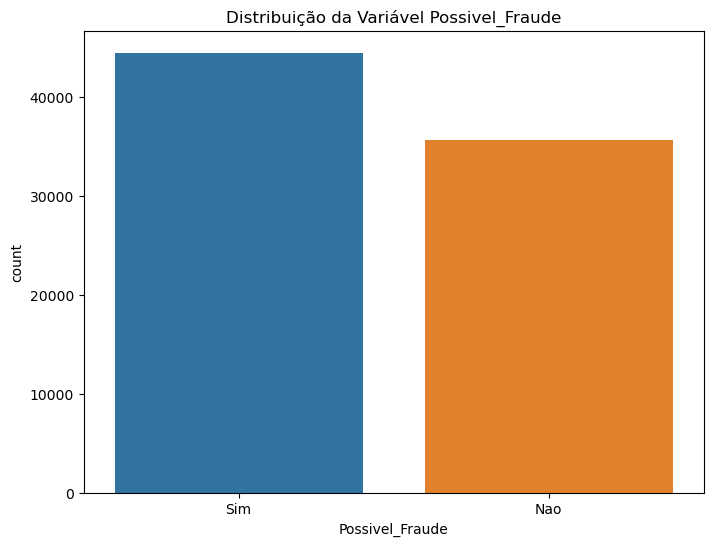

In [870]:
print(df['Possivel_Fraude'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Possivel_Fraude')
plt.title('Distribuição da Variável Possivel_Fraude')
plt.show()

### Variáveis Numéricas
   - Engenharia de recurso em algumas variáveis para melhor distribuição.
   - Análise e tratamento de variáveis se necessário.

In [871]:
variaveis_numericas = df.select_dtypes(include=['int64','float64']).columns
print(variaveis_numericas)

Index(['Contrato', 'Idade', 'Valor_Renda', 'Perc_Juros', 'Prazo_Emprestimo',
       'Prazo_Restante', 'VL_Emprestimo', 'VL_Emprestimo_ComJuros',
       'QT_Total_Parcelas_Pagas', 'QT_Total_Parcelas_Pagas_EmDia',
       'QT_Total_Parcelas_Pagas_EmAtraso', 'Qt_Renegociacao', 'VL_Patrimonio',
       'QT_Parcelas_Atraso', 'QT_Dias_Atraso', 'Saldo_Devedor', 'Total_Pago'],
      dtype='object')


##### Idade

In [872]:
df.groupby(['Idade']).size()

Idade
4         2
6         1
7         1
8         1
9         1
10        1
17       12
18       60
19      424
20     1065
21     1533
22     1688
23     2059
24     2047
25     2310
26     2516
27     2431
28     2641
29     2652
30     2591
31     2512
32     2532
33     2429
34     2493
35     2577
36     2596
37     2333
38     2340
39     2301
40     2214
41     2325
42     2078
43     1997
44     2056
45     1831
46     1691
47     1503
48     1386
49     1366
50     1202
51     1293
52     1056
53     1060
54      977
55      934
56      825
57      781
58      772
59      733
60      716
61      558
62      533
63      470
64      418
65      364
66      379
67      308
68      312
69      332
70      285
71      226
72      148
73      210
74      112
75       93
76       95
77       63
78       59
79       37
80       46
81       33
82       30
83       24
84       19
85       11
86        9
87        5
88        7
89        3
90        3
91        1
92        1
94        

31 até 40 Anos      24327
22 até 30 Anos      20935
41 até 50 Anos      17435
51 até 60 Anos       9147
Acima de 60 Anos     5198
até 21 Anos          3101
Name: Faixa_Etaria, dtype: int64


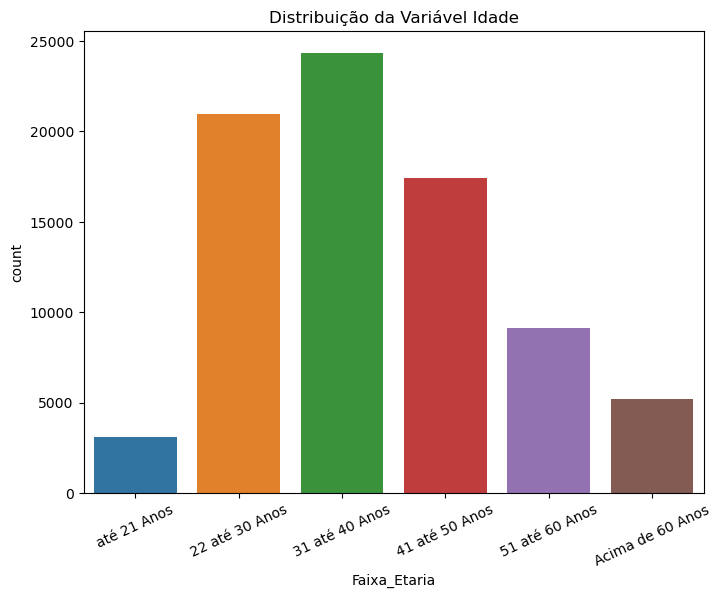

In [873]:
# FAIXA ETARIA
bins = [0,21,30,40,50,60,110]
labels = ['até 21 Anos', '22 até 30 Anos', '31 até 40 Anos', '41 até 50 Anos', '51 até 60 Anos', 'Acima de 60 Anos']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels)

print(df['Faixa_Etaria'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Faixa_Etaria')
plt.title('Distribuição da Variável Idade')
plt.xticks(rotation=25)
plt.show()

##### Valor_Renda

2k até 3k       21491
3k até 5k       21105
1k até 2k       19628
5k até 10k      11680
10k até 20k      3505
Acima de 40k     1435
20k até 30k      1044
Até 1k            255
Name: Faixa_Salarial, dtype: int64


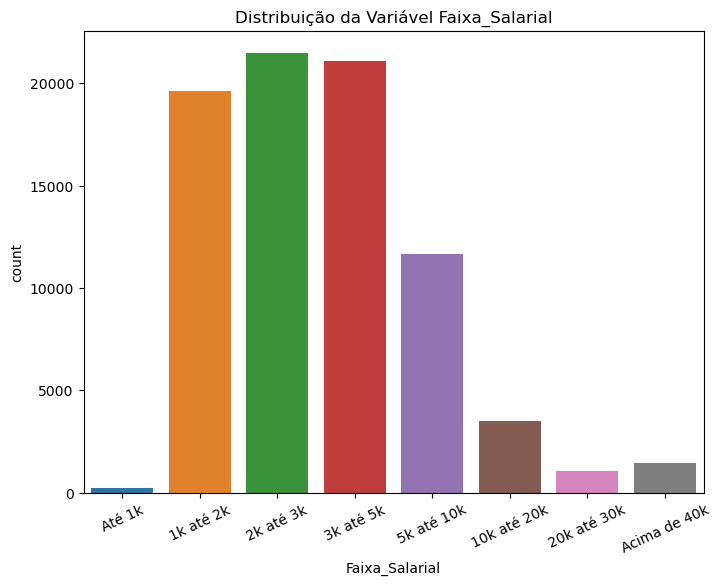

In [874]:
# FAIXA SALARIAL
bins = [-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 900000000]
labels = ['Até 1k', '1k até 2k', '2k até 3k', '3k até 5k', '5k até 10k', '10k até 20k', '20k até 30k', 'Acima de 40k']
df['Faixa_Salarial'] = pd.cut(df['Valor_Renda'], bins=bins, labels=labels)

print(df['Faixa_Salarial'].value_counts())


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Faixa_Salarial')
plt.title('Distribuição da Variável Faixa_Salarial')
plt.xticks(rotation=25)
plt.show()

##### QT_Dias_Atraso

Acima de 360      60939
De 241 até 360     7732
Até 30 dias        3626
De 91 até 180      2802
De 181 até 240     2357
De 31 até 60       1572
De 61 até 90       1115
Name: Faixa_Dias_Atraso, dtype: int64


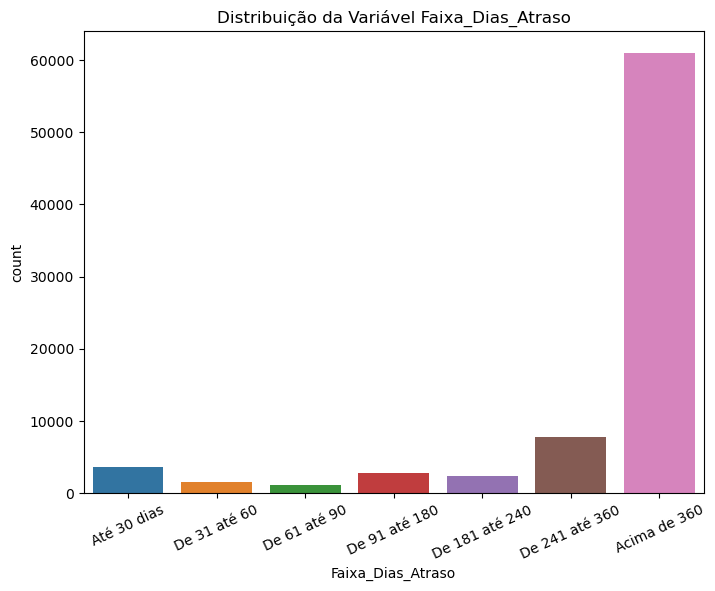

In [875]:
# A VARIÁVEL DIAS_ATRASO CONTEM VALORES NULOS, É UMA VARIAVEL IMPORTANTE PORTANTO SERÁ TRATADA COM SUA MEDIANA .
df['QT_Dias_Atraso'] = df['QT_Dias_Atraso'].fillna(df['QT_Dias_Atraso'].median())


# FAIXA DIAS DE ATRASO
bins = [-100, 30, 60, 90, 180, 240, 360, 1050]
labels = ['Até 30 dias', 'De 31 até 60', 'De 61 até 90', 'De 91 até 180', 'De 181 até 240','De 241 até 360', 'Acima de 360']
df['Faixa_Dias_Atraso'] = pd.cut(df['QT_Dias_Atraso'], bins=bins, labels=labels)

print(df['Faixa_Dias_Atraso'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Faixa_Dias_Atraso')
plt.title('Distribuição da Variável Faixa_Dias_Atraso')
plt.xticks(rotation=25)
plt.show()

##### Prazo_Emprestimo

Até 60 Meses            31764
De 61 até 120 Meses     25123
De 121 até 200 Meses    21455
Acima de 200 Meses       1801
Name: Faixa_Prazo_Emprestimo, dtype: int64


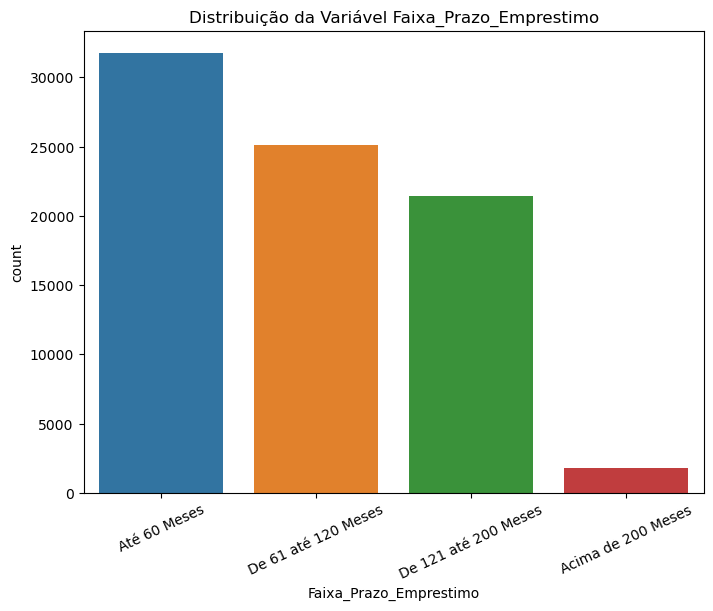

In [876]:
# FAIXA PRAZO EMPRESTIMO
bins = [0, 60, 120, 200, 720]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df['Faixa_Prazo_Emprestimo'] = pd.cut(df['Prazo_Emprestimo'], bins=bins, labels=labels)

print(df['Faixa_Prazo_Emprestimo'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Faixa_Prazo_Emprestimo')
plt.title('Distribuição da Variável Faixa_Prazo_Emprestimo')
plt.xticks(rotation=25)
plt.show()

##### Prazo_Restante

Até 60 Meses            31032
De 61 até 120 Meses     24752
De 121 até 200 Meses    15266
Acima de 200 Meses       9093
Name: Faixa_Prazo_Restante, dtype: int64


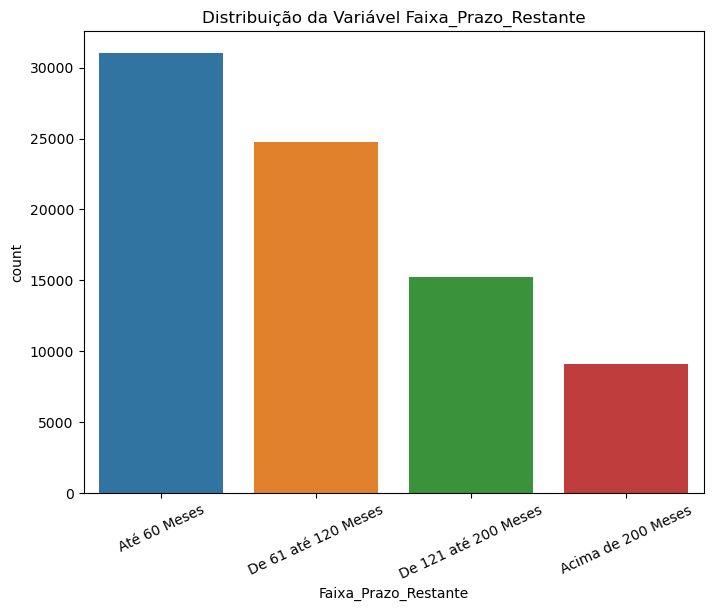

In [877]:
# FAIXA PRAZO RESTANTE
bins = [-20, 60, 120, 200, 500]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df['Faixa_Prazo_Restante'] = pd.cut(df['Prazo_Restante'], bins=bins, labels=labels)

print(df['Faixa_Prazo_Restante'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Faixa_Prazo_Restante')
plt.title('Distribuição da Variável Faixa_Prazo_Restante')
plt.xticks(rotation=25)
plt.show()

Algumas outras variáveis qua não possuem relevancia serão retiradas para criação do modelo.
   - Contrato - Identificação de cada cliente, irrelevante para modelagem.
   - Data_Contratacao - Não será feito nenhuma análise temporal, portanto não é necessaria.
   - Valor_Patrimonio também será retirada.
   - Idade, Valor_Renda, Prazo_Emprestimo, QT_Dias_Atraso e Prazo_Restante - Essas variáveis já foram tratadas com as faixas, portanto serão retiradas.
   - Escolaridade e Possui_Patrimonio já foram retiradas anteriormente.

In [878]:
#  VARIÁVEIS QUE SERAO UTILIZADAS NO MODELO 

variaveis = ['Sexo', 'UF_Cliente', 'Perc_Juros', 
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'QT_Parcelas_Atraso', 'Saldo_Devedor', 
       'Total_Pago', 'Faixa_Prazo_Restante', 'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Etaria', 
       'Faixa_Dias_Atraso', 'Possivel_Fraude']

base = pd.DataFrame(df, columns=variaveis)
print(base.shape)

(80143, 19)


In [879]:
base.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

In [880]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              80143 non-null  object  
 1   UF_Cliente                        80143 non-null  object  
 2   Perc_Juros                        80143 non-null  float64 
 3   VL_Emprestimo                     80143 non-null  float64 
 4   VL_Emprestimo_ComJuros            80143 non-null  float64 
 5   QT_Total_Parcelas_Pagas           80143 non-null  int64   
 6   QT_Total_Parcelas_Pagas_EmDia     80143 non-null  int64   
 7   QT_Total_Parcelas_Pagas_EmAtraso  80143 non-null  int64   
 8   Qt_Renegociacao                   80143 non-null  int64   
 9   Estado_Civil                      80143 non-null  object  
 10  QT_Parcelas_Atraso                80143 non-null  int64   
 11  Saldo_Devedor                     80143 non-null  floa

#### Relação das variáveis categoricas com a Target (Possivel_Fraude)

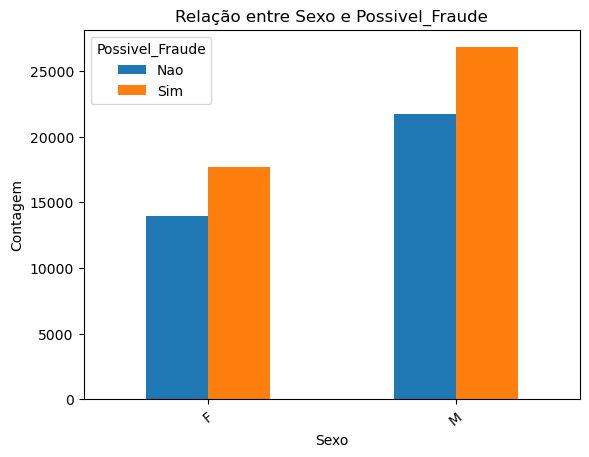

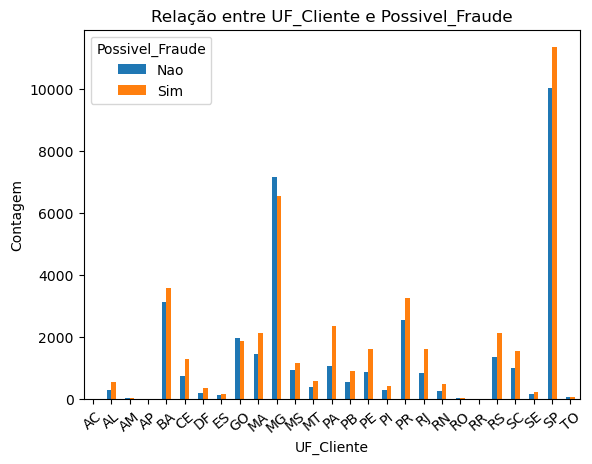

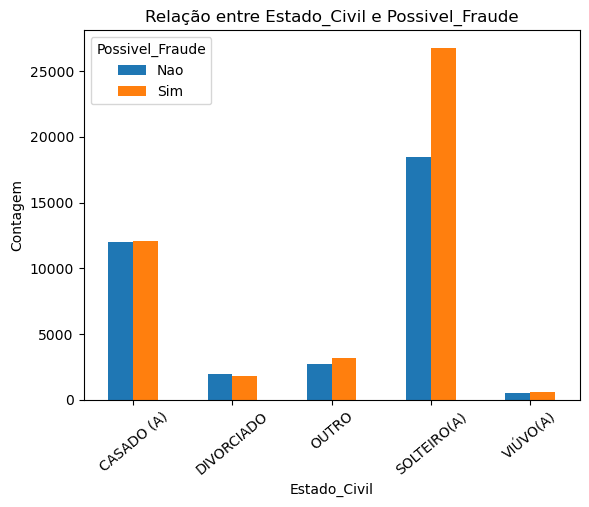

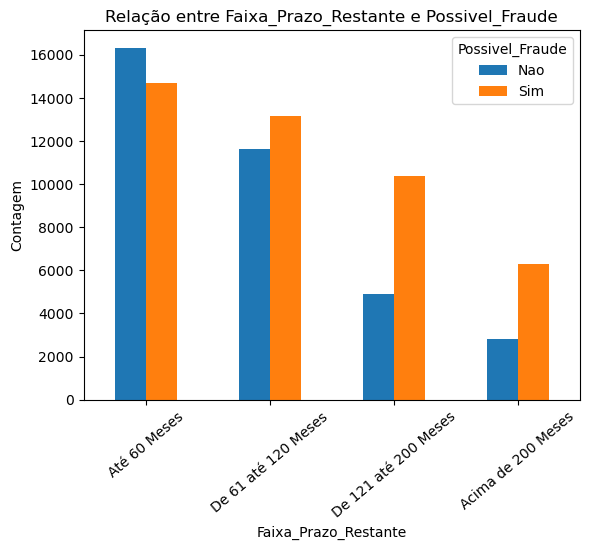

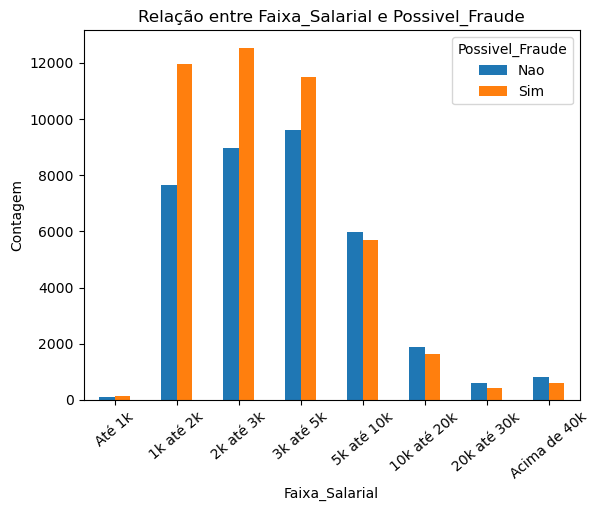

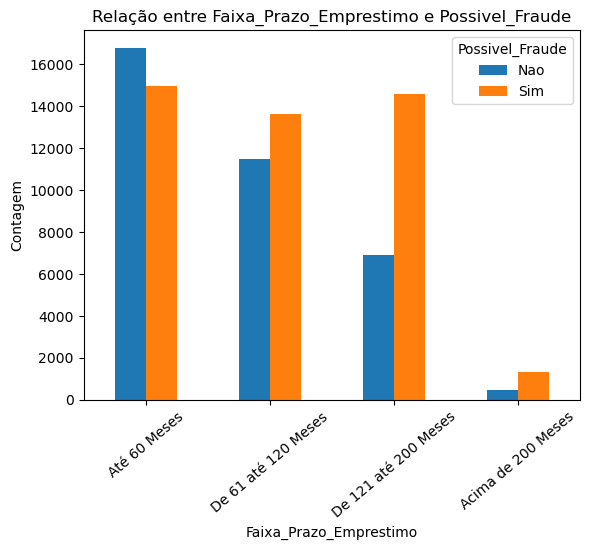

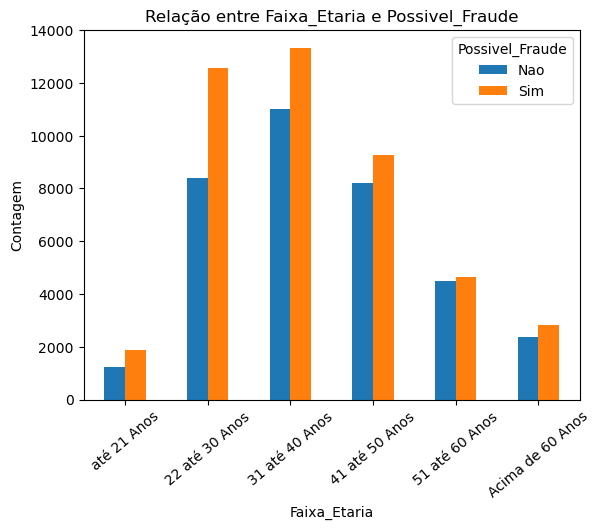

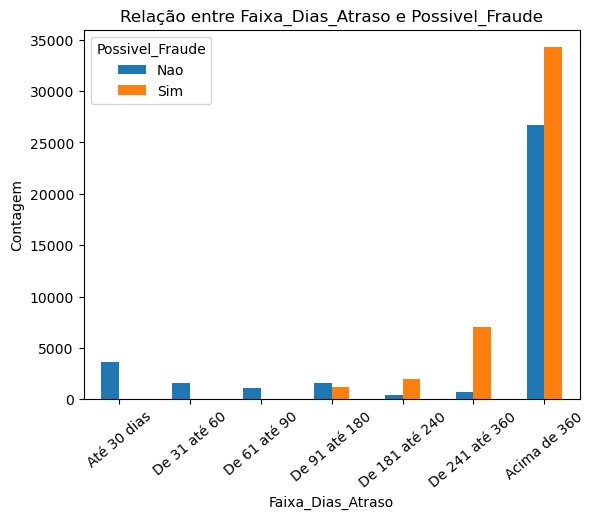

In [908]:
#Variáveis categóricas (removendo a variável target)
variaveis_categoricas = ['Sexo', 'UF_Cliente', 'Estado_Civil', 'Faixa_Prazo_Restante',
                         'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Etaria',
                         'Faixa_Dias_Atraso']

for col in variaveis_categoricas:
    cross_tab = pd.crosstab(df[col], df['Possivel_Fraude'])
    
    cross_tab.plot(kind='bar')
    plt.title(f'Relação entre {col} e Possivel_Fraude')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=40)
    plt.show()

#### Distribuição das variaveis numéricas

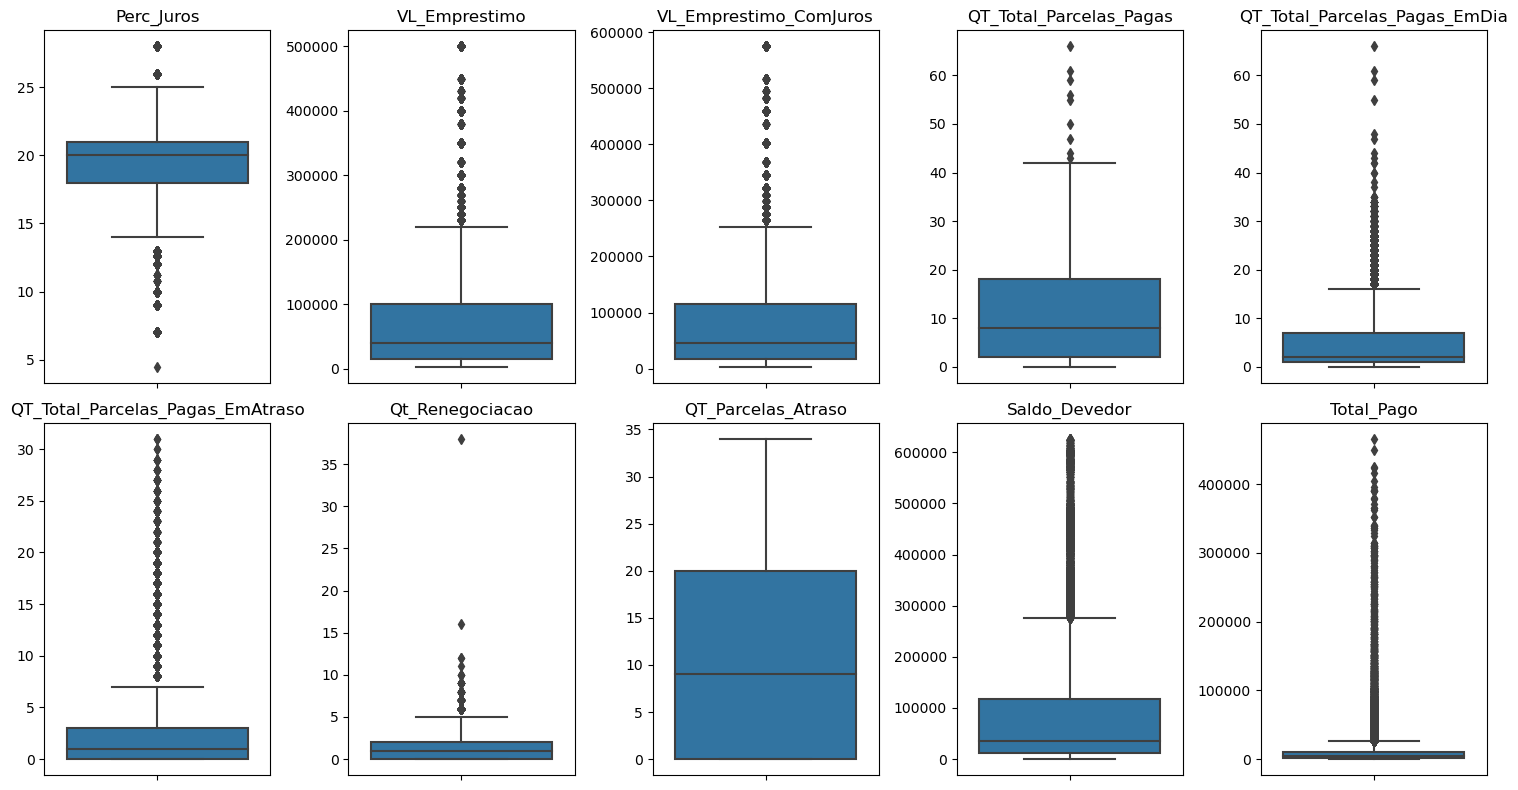

In [882]:
variaveis_numericas = base.select_dtypes(include=['int64','float64']).columns

fig, axs = plt.subplots(2, 5, figsize=(15, 8))

for ax, var in zip(axs.ravel(), variaveis_numericas):
    sns.boxplot(data=base, y=var, ax=ax)
    ax.set_title(var)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

#### Encoder das variaveis categoricas

In [883]:
variaveis_categoricas

['Sexo',
 'UF_Cliente',
 'Estado_Civil',
 'Faixa_Prazo_Restante',
 'Faixa_Salarial',
 'Faixa_Prazo_Emprestimo',
 'Faixa_Etaria',
 'Faixa_Dias_Atraso']

In [884]:
lb = LabelEncoder()

for var in variaveis_categoricas:
    base[var] = lb.fit_transform(base[var])

In [885]:
base.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso,Possivel_Fraude
0,1,9,17.00,160000.00,184000.00,2,1,1,2,3,10,187861.70,1617.36,2,4,2,2,3,Sim
1,1,9,20.00,14000.00,16100.00,2,1,1,1,0,26,16615.93,1239.98,1,3,1,1,0,Sim
2,0,25,24.00,60000.00,69000.00,4,1,0,1,0,27,74443.40,1346.64,2,3,2,1,0,Sim
3,1,6,19.00,180000.00,207000.00,29,28,0,2,3,2,196812.41,22713.63,2,3,2,0,4,Nao
4,0,10,22.00,30000.00,34500.00,4,3,0,1,3,6,36114.39,900.80,3,4,3,5,6,Sim


In [886]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sexo                              80143 non-null  int32  
 1   UF_Cliente                        80143 non-null  int32  
 2   Perc_Juros                        80143 non-null  float64
 3   VL_Emprestimo                     80143 non-null  float64
 4   VL_Emprestimo_ComJuros            80143 non-null  float64
 5   QT_Total_Parcelas_Pagas           80143 non-null  int64  
 6   QT_Total_Parcelas_Pagas_EmDia     80143 non-null  int64  
 7   QT_Total_Parcelas_Pagas_EmAtraso  80143 non-null  int64  
 8   Qt_Renegociacao                   80143 non-null  int64  
 9   Estado_Civil                      80143 non-null  int32  
 10  QT_Parcelas_Atraso                80143 non-null  int64  
 11  Saldo_Devedor                     80143 non-null  float64
 12  Tota

In [887]:
base['Possivel_Fraude'].value_counts()

Sim    44511
Nao    35632
Name: Possivel_Fraude, dtype: int64

In [888]:
base.describe()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
count,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00
mean,0.61,15.43,19.49,72847.78,83774.94,10.71,5.24,2.34,1.30,1.94,10.65,78622.32,9687.98,1.69,2.99,1.87,1.53,0.75
std,0.49,7.55,3.56,87407.93,100519.12,9.31,6.21,3.97,1.27,1.37,10.43,102318.95,19090.62,1.03,1.56,0.89,1.36,1.55
min,0.00,0.00,4.49,3000.00,3450.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,10.00,18.00,15000.00,17250.00,2.00,1.00,0.00,0.00,0.00,0.00,12122.76,1052.16,1.00,1.00,1.00,0.00,0.00
50%,1.00,15.00,20.00,40000.00,46000.00,8.00,2.00,1.00,1.00,3.00,9.00,35489.36,3951.39,1.00,3.00,2.00,1.00,0.00
75%,1.00,25.00,21.00,100000.00,115000.00,18.00,7.00,3.00,2.00,3.00,20.00,117783.25,10886.24,3.00,4.00,3.00,2.00,0.00
max,1.00,26.00,28.00,500000.00,575000.00,66.00,66.00,31.00,38.00,4.00,34.00,626261.27,465821.39,3.00,7.00,3.00,5.00,6.00


Como algumas variáveis estao em escalas diferentes, para eliminar vieses, facilitar a interpretação e obter melhor desempenho será aplicada uma tecnica de normalizaçao dos dados 

#### Variáveis Preditoras e Target

In [889]:
X = base.drop('Possivel_Fraude', axis=1) 
y = base['Possivel_Fraude']  

In [890]:
X.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
0,1,9,17.00,160000.00,184000.00,2,1,1,2,3,10,187861.70,1617.36,2,4,2,2,3
1,1,9,20.00,14000.00,16100.00,2,1,1,1,0,26,16615.93,1239.98,1,3,1,1,0
2,0,25,24.00,60000.00,69000.00,4,1,0,1,0,27,74443.40,1346.64,2,3,2,1,0
3,1,6,19.00,180000.00,207000.00,29,28,0,2,3,2,196812.41,22713.63,2,3,2,0,4
4,0,10,22.00,30000.00,34500.00,4,3,0,1,3,6,36114.39,900.80,3,4,3,5,6


In [891]:
y.head()

0    Sim
1    Sim
2    Sim
3    Nao
4    Sim
Name: Possivel_Fraude, dtype: object

In [892]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [893]:
X_train.shape

(64114, 18)

In [894]:
normalizador = MinMaxScaler()

X_train_normalizado = normalizador.fit_transform(X_train)
X_test_normalizado = normalizador.fit_transform(X_test)

In [895]:
X_test_normalizado

array([[1.        , 0.65384615, 0.57459299, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.84615385, 0.65967439, ..., 0.33333333, 0.6       ,
        0.        ],
       [0.        , 0.38461538, 0.57459299, ..., 1.        , 0.6       ,
        0.        ],
       ...,
       [1.        , 0.96153846, 0.7447558 , ..., 0.        , 0.2       ,
        0.        ],
       [1.        , 0.96153846, 0.8298372 , ..., 0.33333333, 0.4       ,
        0.5       ],
       [0.        , 0.88461538, 0.65967439, ..., 0.33333333, 0.8       ,
        0.        ]])

In [896]:
X_train_normalizado

array([[0.        , 0.15384615, 0.66666667, ..., 0.33333333, 0.6       ,
        0.        ],
       [1.        , 0.96153846, 0.52380952, ..., 0.33333333, 0.2       ,
        0.        ],
       [0.        , 0.73076923, 0.80952381, ..., 0.        , 0.2       ,
        0.        ],
       ...,
       [1.        , 0.96153846, 0.52380952, ..., 0.66666667, 0.2       ,
        0.        ],
       [1.        , 0.19230769, 0.52380952, ..., 1.        , 0.4       ,
        0.        ],
       [0.        , 0.15384615, 0.61904762, ..., 0.66666667, 0.        ,
        0.        ]])

## Modelos

   - Modelos a serem testados:
       - Random Forest
       - Support Vector Machines (SVM)
       - K-Nearest Neighbors (k-NN)

##### Random Forest

In [897]:
rf_modelo = RandomForestClassifier(random_state=42)

rf_modelo.fit(X_train_normalizado, y_train)

predicao = rf_modelo.predict(X_test_normalizado)

acuracia = accuracy_score(y_test, predicao)
report = classification_report(y_test, predicao)

print("Random Forest Model:")
print(f'Acurácia do modelo: {acuracia:.2f}')
print('Relatório de Classificação:')
print(report)

Random Forest Model:
Acurácia do modelo: 0.99
Relatório de Classificação:
              precision    recall  f1-score   support

         Nao       0.98      1.00      0.99      7153
         Sim       1.00      0.98      0.99      8876

    accuracy                           0.99     16029
   macro avg       0.99      0.99      0.99     16029
weighted avg       0.99      0.99      0.99     16029



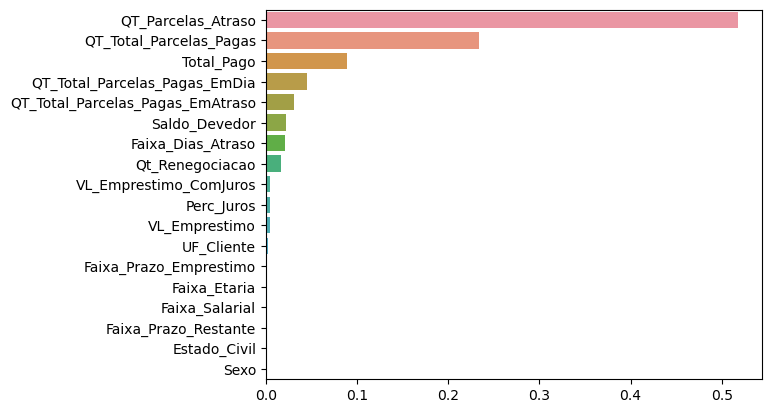

QT_Parcelas_Atraso                 0.52
QT_Total_Parcelas_Pagas            0.23
Total_Pago                         0.09
QT_Total_Parcelas_Pagas_EmDia      0.05
QT_Total_Parcelas_Pagas_EmAtraso   0.03
Saldo_Devedor                      0.02
Faixa_Dias_Atraso                  0.02
Qt_Renegociacao                    0.02
VL_Emprestimo_ComJuros             0.00
Perc_Juros                         0.00
VL_Emprestimo                      0.00
UF_Cliente                         0.00
Faixa_Prazo_Emprestimo             0.00
Faixa_Etaria                       0.00
Faixa_Salarial                     0.00
Faixa_Prazo_Restante               0.00
Estado_Civil                       0.00
Sexo                               0.00
dtype: float64


In [898]:
# CLASSIFICAÇÃO DAS FEATURES
importances = pd.Series(data=rf_modelo.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index)
plt.show()

print(importances.sort_values(ascending=False))

In [899]:
scores = rf_modelo.score(X_train_normalizado, y_train)
scores

1.0

In [900]:
scores = rf_modelo.score(X_test_normalizado, y_test)
scores

0.9893942229708653

##### Support Vector Machines (SVM)

In [901]:
svm_modelo = SVC(kernel='linear', random_state=42)

svm_modelo.fit(X_train_normalizado, y_train)

predicao = svm_modelo.predict(X_test_normalizado)

acuracia_svm = accuracy_score(y_test, predicao)
report_svm = classification_report(y_test, predicao)

print("SVM Model:")
print(f'Acurácia do modelo: {acuracia_svm:.2f}')
print('Relatório de Classificação:')
print(report_svm)

SVM Model:
Acurácia do modelo: 0.97
Relatório de Classificação:
              precision    recall  f1-score   support

         Nao       0.94      0.99      0.97      7153
         Sim       0.99      0.95      0.97      8876

    accuracy                           0.97     16029
   macro avg       0.97      0.97      0.97     16029
weighted avg       0.97      0.97      0.97     16029



##### K-Nearest Neighbors (k-NN)

In [902]:
knn_modelo = KNeighborsClassifier(n_neighbors=5)

knn_modelo.fit(X_train_normalizado, y_train)

predicao = knn_modelo.predict(X_test_normalizado)

acuracia_knn = accuracy_score(y_test, predicao)
report_knn = classification_report(y_test, predicao)

print("k-NN Model:")
print(f'Acurácia do modelo: {acuracia_knn:.2f}')
print('Relatório de Classificação:')
print(report_knn)

k-NN Model:
Acurácia do modelo: 0.97
Relatório de Classificação:
              precision    recall  f1-score   support

         Nao       0.97      0.97      0.97      7153
         Sim       0.97      0.98      0.97      8876

    accuracy                           0.97     16029
   macro avg       0.97      0.97      0.97     16029
weighted avg       0.97      0.97      0.97     16029



Melhor modelo Random Forest

Projeto em parte final de desenvolvimento Deploy com interface interativa 